In [73]:
import heartpy as hp
import numpy as np
import pandas as pd

In [74]:
# Testing code
data, timer = hp.load_exampledata(0)
fs = 100.0 #example file 0 is sampled at 100.0 Hz

working_data, measures = hp.process(data, fs, report_time=True)

print(measures['bpm']) #returns BPM value
print(measures['rmssd']) # returns RMSSD HRV measure

# Reference code

# Peak Enhancement
# enhanced = hp.enhance_peaks(data, iterations=2)


Finished in 0.011518 sec
58.898847631242
64.73723110319973


# No filtering

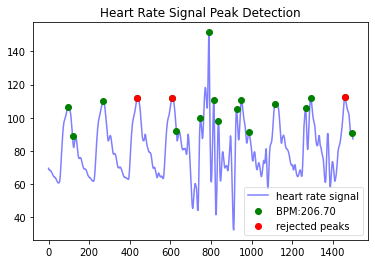

In [75]:
data = hp.get_data('Data/Raw Data/Multiple Cath/X001.txt', delim = ' ', column_name = 'AO')
data = data[0:1500]
working_data, measures = hp.process(data, 240.0)
hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')

# Filtering as described in paper

In [76]:
data1 = hp.get_data('Data/Raw Data/Multiple Cath/X001.txt', delim = ' ', column_name = 'AO')
data1 = data1[0:1500]

filtered_a = hp.filter_signal(data, cutoff=15, sample_rate=240.0, order=4, filtertype='lowpass')
filtered_b = hp.filter_signal(filtered_a, cutoff=.01, sample_rate=240.0, order=4, filtertype='highpass')
working_data, measures = hp.process(filtered_b, 240.0)


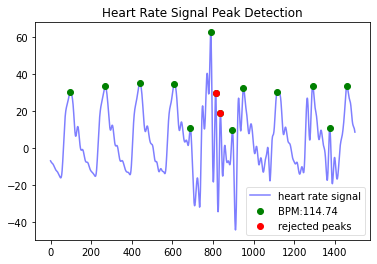

In [77]:
plot = hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')

# Generalizing

In [78]:
def preprocess(data):
    filtered_a = hp.filter_signal(data, cutoff=15, sample_rate=240.0, order=4, filtertype='lowpass')
    filtered_b = hp.filter_signal(filtered_a, cutoff=.01, sample_rate=240.0, order=4, filtertype='highpass')
    working_data, measures = hp.process(filtered_b, 240.0)
    plot = hp.plotter(working_data, measures, show = True, title = 'Heart Rate Signal Peak Detection')
    return working_data, measures, plot

X001.txt


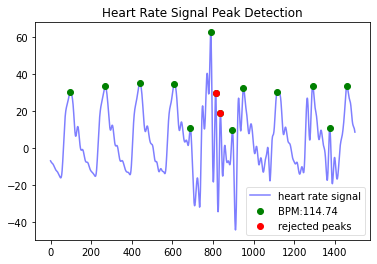

X002.txt


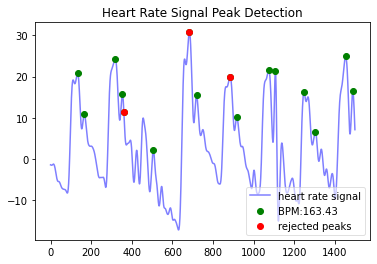

X003.txt


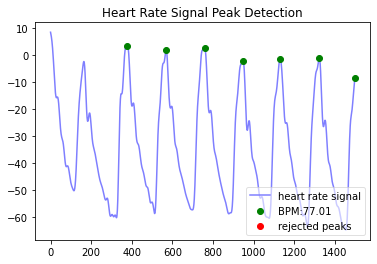

X004.txt


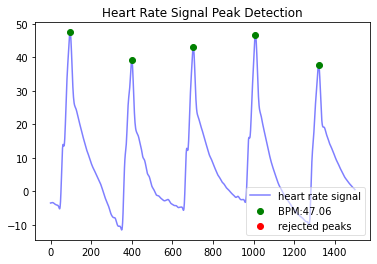

X005.txt


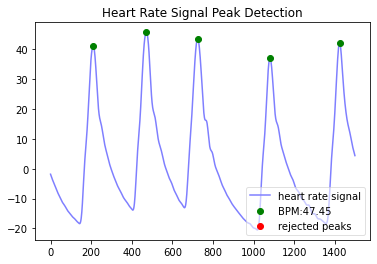

X006.txt


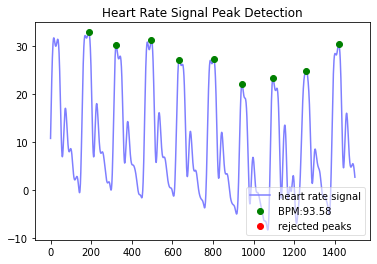

X007.txt


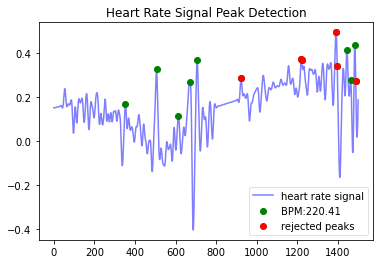

X008.txt


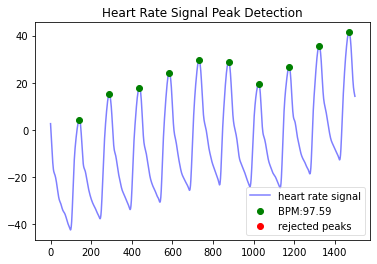

X009.txt


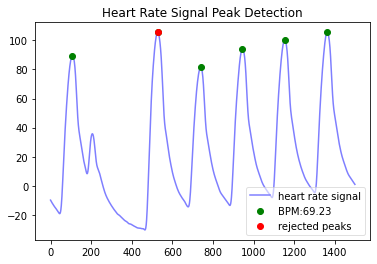

X010.txt


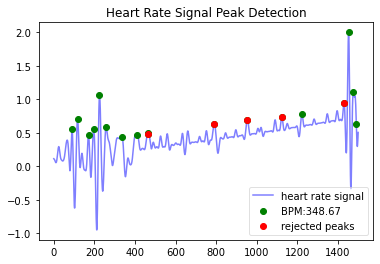

X011.txt


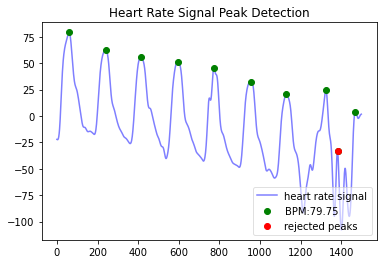

X012.txt


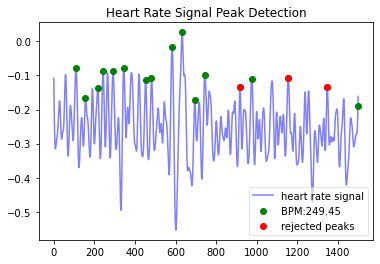

X013.txt


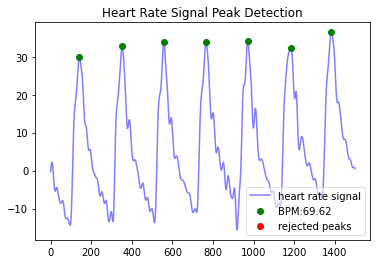

X014.txt
An error occurred
X015.txt


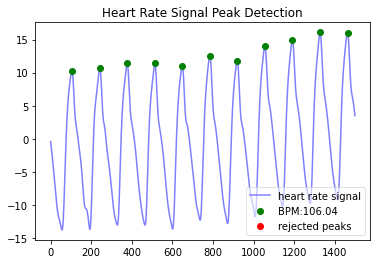

X016.txt


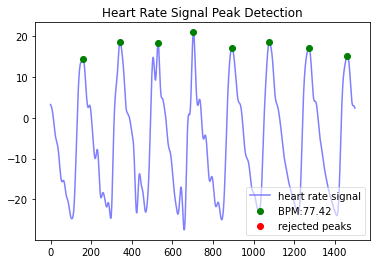

X017.txt


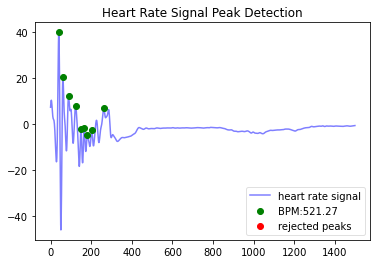

X018.txt
/home/anrath/miniconda3/envs/biopeaks/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


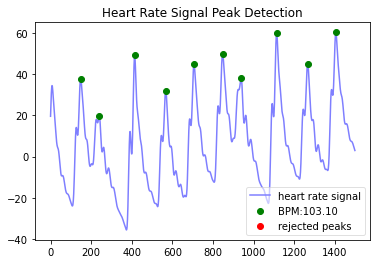

X019.txt


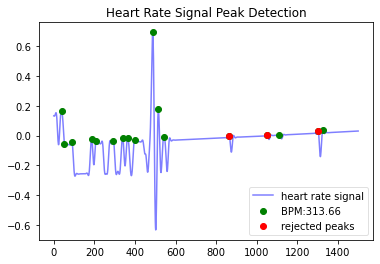

X020.txt


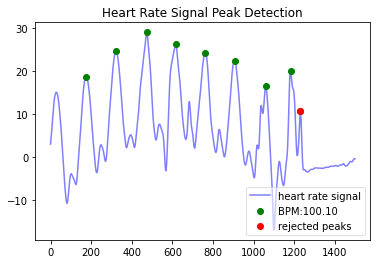

X021.txt


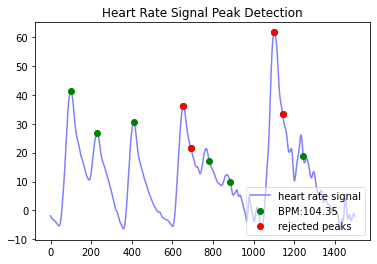

X022.txt


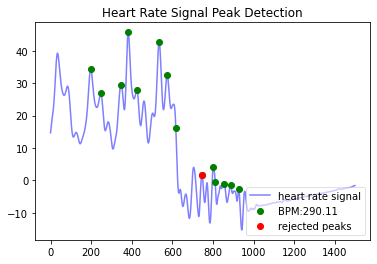

In [81]:
for d in range(22):
    d += 1
    if(d < 10):
        d = '0' + str(d)
    else:
        d = str(d)
    data = hp.get_data('Data/Raw Data/Multiple Cath/X0' + d + '.txt', delim = ' ', column_name = 'AO')
    data = data[0:1500]
    print('X0' + d + '.txt')
    try:
        working_data, measures, plot = preprocess(data)
    except:
        print('An error occurred')
        # X014 has an error due to hp.filter_signal returning bad values